-Instantáneo:
    - Impulsar en el perigeo y el apogeo "intantáneamente" (hecho).
    - Impulsar 2 veces el apogeo.
    - Evaluar deorbiting.
    
-Finito:
    - Mismo escenario, considerando un impulso finito:
            - evaluar la duración del combustible sólido (o propulsión iónica en el caso deorbiting).
            - Cambio de masa durante la propulsión.
            
*Cambio de masa entre un impulso y otro.
*agregar el resto de las perturbaciones.
*Agregar sección que detecte cuándo y con qué potencia impulsarse.

In [1]:
%%html
<style>
.output_wrapper button.btn.btn-default,
.output_wrapper .ui-dialog-titlebar {
  display: inline;
}
</style>

In [2]:
import numpy as np
import scipy.integrate as integrate
from scipy.signal import argrelextrema
import matplotlib as mpl
import matplotlib.pyplot as  plt
import mplcursors
from mpl_toolkits.mplot3d import Axes3D

from models import atmosDensity
from maneuvers import Maneuvers
from coordinates import cart2kep

In [3]:
#Conwell's Method
# ----UNIVERSAL CONSTANTS----
# Universal Gravity
G = 6.67e-11
# Earth Mass
Me = 5.97e24
#Earth Radius
Re = 6378e3
#Earth Angular Speed
wE = np.array([0,0,7.2921159e-5])
#---------------------------
mu = G*Me
rp = Re+370e3
ra = Re+370e3
#rp = Re+350e3
#ra = Re+350e3
Omega = 340*np.pi/180
i = 65.1*np.pi/180
omega = 58*np.pi/180
M = 332*np.pi/180
#-------------------
e = (ra-rp)/(ra+rp)
a = (ra+rp)/2
h = (mu*a*(1-e**2))**0.5
T = 2*np.pi/mu**0.5*a**(3/2)
Aceleration = 0.3
#--------------------
print("Starting propagations...")
maneuvers = Maneuvers([a,e,i,omega,Omega,M,0,mu])
maneuvers.addPerturbation("atmosphere")

maneuvers.propagate(60*60,350)
#maneuvers.propagate(60*60*24*86)
print("=============================================================================")
print("First propagation ended...")

maneuvers.impulsive_maneuver(Aceleration,1)
maneuvers.propagate(60*10,370)
maneuvers.impulsive_maneuver(0,1)
#maneuvers.impulsive_maneuver(maneuvers.current_v/np.linalg.norm(maneuvers.current_v)*5.7)
#maneuvers.propagate(60*60*(1.52/2))
#maneuvers.impulsive_maneuver(maneuvers.current_v/np.linalg.norm(maneuvers.current_v)*5.7)
print("=============================================================================")
print("Second propagation ended...")

maneuvers.propagate(60*60,350)
#maneuvers.propagate(60*60*24*90)
print("=============================================================================")
print("Last propagation ended.")

final_plots = 0

Starting propagations...
Day:0.0	Height: 370.0 km	Mass: 3Kg
Orbital Energy:-29504964.433906343
Day:8.146197006217566e-08	Height: 370.0000002165986 km	Mass: 3Kg
Orbital Energy:-29504964.43017201
Day:8.146197006217566e-08	Height: 369.9999997833995 km	Mass: 3Kg
Orbital Energy:-29504964.43774849
Day:1.6292394012435132e-07	Height: 369.9999999999991 km	Mass: 3Kg
Orbital Energy:-29504964.434014145
Day:1.6292394012435132e-07	Height: 369.9999995668009 km	Mass: 3Kg
Orbital Energy:-29504964.44159062
Day:2.4102756024514064e-05	Height: 369.99999959272054 km	Mass: 3Kg
Orbital Energy:-29504964.45697276
Day:2.4102756024514064e-05	Height: 369.99999954060183 km	Mass: 3Kg
Orbital Energy:-29504964.45788659
Day:4.8042588108903785e-05	Height: 369.9999996704692 km	Mass: 3Kg
Orbital Energy:-29504964.471457154
Day:4.8042588108903785e-05	Height: 369.9999995149039 km	Mass: 3Kg
Orbital Energy:-29504964.47417788
Day:7.198242019329349e-05	Height: 369.99999967038815 km	Mass: 3Kg
Orbital Energy:-29504964.487297215
Da

Day:2.000041998194323	Height: 369.60110071628634 km	Mass: 3Kg
Orbital Energy:-29506712.995614994
Day:2.000041998194323	Height: 369.6010891729379 km	Mass: 3Kg
Orbital Energy:-29506713.19732555
Day:2.0	Height: 369.60110846668204 km	Mass: 3Kg
Orbital Energy:-29506713.159134768
Day:2.000000217729306	Height: 369.6011099172486 km	Mass: 3Kg
Orbital Energy:-29506713.132211372
Day:2.000000217729306	Height: 369.60110682223456 km	Mass: 3Kg
Orbital Energy:-29506713.186348338
Day:2.000000435458612	Height: 369.6011082728002 km	Mass: 3Kg
Orbital Energy:-29506713.159424946
Day:2.000000435458612	Height: 369.6011051777862 km	Mass: 3Kg
Orbital Energy:-29506713.21356192
Day:2.0000233354587893	Height: 369.6010950008873 km	Mass: 3Kg
Orbital Energy:-29506713.2284312
Day:2.0000233354587893	Height: 369.60109495681434 km	Mass: 3Kg
Orbital Energy:-29506713.229208156
Day:2.0000462354589668	Height: 369.60108486217445 km	Mass: 3Kg
Orbital Energy:-29506713.24256272
Day:2.0000462354589668	Height: 369.6010847318368 km

Day:5.000048342811782	Height: 369.0152903161943 km	Mass: 3Kg
Orbital Energy:-29509287.168817166
Day:5.000048342811782	Height: 369.0152907995861 km	Mass: 3Kg
Orbital Energy:-29509287.16043463
Day:5.0	Height: 369.01531945406555 km	Mass: 3Kg
Orbital Energy:-29509287.131994724
Day:5.000000028309917	Height: 369.0153194633387 km	Mass: 3Kg
Orbital Energy:-29509287.13155601
Day:5.000000028309917	Height: 369.0153194110058 km	Mass: 3Kg
Orbital Energy:-29509287.13247157
Day:5.000000056619834	Height: 369.0153194202799 km	Mass: 3Kg
Orbital Energy:-29509287.13203285
Day:5.000000056619834	Height: 369.0153193679461 km	Mass: 3Kg
Orbital Energy:-29509287.132948413
Day:5.000011651360561	Height: 369.0153124481235 km	Mass: 3Kg
Orbital Energy:-29509287.14073176
Day:5.000011651360561	Height: 369.01531244525313 km	Mass: 3Kg
Orbital Energy:-29509287.14078216
Day:5.000023246101288	Height: 369.0153055262091 km	Mass: 3Kg
Orbital Energy:-29509287.14846553
Day:5.000023246101288	Height: 369.01530551763346 km	Mass: 3

Day:7.0001536154055515	Height: 368.6046058286503 km	Mass: 3Kg
Orbital Energy:-29511031.097375043
Day:7.0001536154055515	Height: 368.6043393595433 km	Mass: 3Kg
Orbital Energy:-29511035.757303864
Day:7.0	Height: 368.6043929665526 km	Mass: 3Kg
Orbital Energy:-29511035.612880953
Day:7.000000512991741	Height: 368.6044013859276 km	Mass: 3Kg
Orbital Energy:-29511035.462877445
Day:7.000000512991741	Height: 368.6043841998046 km	Mass: 3Kg
Orbital Energy:-29511035.76358048
Day:7.000001025983484	Height: 368.60439261919817 km	Mass: 3Kg
Orbital Energy:-29511035.613576967
Day:7.000001025983484	Height: 368.60437543307523 km	Mass: 3Kg
Orbital Energy:-29511035.914280005
Day:7.000031495042744	Height: 368.6043652196806 km	Mass: 3Kg
Orbital Energy:-29511035.933695648
Day:7.000031495042744	Height: 368.6043650799887 km	Mass: 3Kg
Orbital Energy:-29511035.936171785
Day:7.000061964102005	Height: 368.6043552083019 km	Mass: 3Kg
Orbital Energy:-29511035.95085029
Day:7.000061964102005	Height: 368.6043547995966 km	M

Day:10.000100365126661	Height: 368.00000169139355 km	Mass: 3Kg
Orbital Energy:-29513665.8023928
Day:10.000100365126661	Height: 367.99997858464997 km	Mass: 3Kg
Orbital Energy:-29513666.2067581
Day:10.0	Height: 367.99998073554036 km	Mass: 3Kg
Orbital Energy:-29513666.134726707
Day:10.00000033173757	Height: 367.9999843214936 km	Mass: 3Kg
Orbital Energy:-29513666.072057024
Day:10.00000033173757	Height: 367.9999771332247 km	Mass: 3Kg
Orbital Energy:-29513666.19785166
Day:10.000000663475143	Height: 367.9999807191901 km	Mass: 3Kg
Orbital Energy:-29513666.13518197
Day:10.000000663475143	Height: 367.9999735309221 km	Mass: 3Kg
Orbital Energy:-29513666.260976613
Day:10.000027008912545	Height: 367.9999729557512 km	Mass: 3Kg
Orbital Energy:-29513666.278362308
Day:10.000027008912545	Height: 367.9999728781423 km	Mass: 3Kg
Orbital Energy:-29513666.27973333
Day:10.000053354349948	Height: 367.9999725269014 km	Mass: 3Kg
Orbital Energy:-29513666.29446586
Day:10.000053354349948	Height: 367.99997229839397 k

Day:13.000253534060853	Height: 367.3713406212116 km	Mass: 3Kg
Orbital Energy:-29516417.17657628
Day:13.000253534060853	Height: 367.37151883275527 km	Mass: 3Kg
Orbital Energy:-29516414.052546166
Day:13.0	Height: 367.3716920116078 km	Mass: 3Kg
Orbital Energy:-29516413.910089813
Day:13.000000214087345	Height: 367.37169335796216 km	Mass: 3Kg
Orbital Energy:-29516413.884033307
Day:13.000000214087345	Height: 367.37169036364367 km	Mass: 3Kg
Orbital Energy:-29516413.93644361
Day:13.000000428174692	Height: 367.3716917100027 km	Mass: 3Kg
Orbital Energy:-29516413.910387106
Day:13.000000428174692	Height: 367.37168871568423 km	Mass: 3Kg
Orbital Energy:-29516413.96279741
Day:13.000023192165287	Height: 367.37167272948756 km	Mass: 3Kg
Orbital Energy:-29516413.978220034
Day:13.000023192165287	Height: 367.3716726863729 km	Mass: 3Kg
Orbital Energy:-29516413.978980873
Day:13.00004595615588	Height: 367.37165683971347 km	Mass: 3Kg
Orbital Energy:-29516413.99292027
Day:13.00004595615588	Height: 367.371656712

Day:16.000138249122447	Height: 366.74892708717937 km	Mass: 3Kg
Orbital Energy:-29519123.89708131
Day:16.000138249122447	Height: 366.74887357893584 km	Mass: 3Kg
Orbital Energy:-29519124.36545155
Day:16.000138249122447	Height: 366.74892658872346 km	Mass: 3Kg
Orbital Energy:-29519123.90144441
Day:16.000138249122447	Height: 366.74888058928775 km	Mass: 3Kg
Orbital Energy:-29519124.304088283
Day:16.000138249122447	Height: 366.74892708717937 km	Mass: 3Kg
Orbital Energy:-29519123.570376776
Day:16.000138249122447	Height: 366.74892708717937 km	Mass: 3Kg
Orbital Energy:-29519124.133341607
Day:16.000138249122447	Height: 366.74892708717937 km	Mass: 3Kg
Orbital Energy:-29519124.21385865
Day:16.0	Height: 366.7489843649762 km	Mass: 3Kg
Orbital Energy:-29519123.696188707
Day:16.000000151381172	Height: 366.74898505807573 km	Mass: 3Kg
Orbital Energy:-29519123.683187895
Day:16.000000151381172	Height: 366.7489835606683 km	Mass: 3Kg
Orbital Energy:-29519123.70940223
Day:16.00000030276234	Height: 366.7489842

Day:19.0002010641862	Height: 366.13051298908147 km	Mass: 3Kg
Orbital Energy:-29521798.798778273
Day:19.0002010641862	Height: 366.1304926911518 km	Mass: 3Kg
Orbital Energy:-29521799.153994497
Day:19.0	Height: 366.1305092829885 km	Mass: 3Kg
Orbital Energy:-29521799.001423787
Day:19.000000140389215	Height: 366.1305099128904 km	Mass: 3Kg
Orbital Energy:-29521798.990246594
Day:19.000000140389215	Height: 366.13050862480884 km	Mass: 3Kg
Orbital Energy:-29521799.012800533
Day:19.00000028077843	Height: 366.13050925471634 km	Mass: 3Kg
Orbital Energy:-29521799.001623314
Day:19.00000028077843	Height: 366.1305079666348 km	Mass: 3Kg
Orbital Energy:-29521799.02417724
Day:19.000020053309534	Height: 366.1305060290434 km	Mass: 3Kg
Orbital Energy:-29521799.038011376
Day:19.000020053309534	Height: 366.13050600458405 km	Mass: 3Kg
Orbital Energy:-29521799.038441997
Day:19.00003982584064	Height: 366.1305041970806 km	Mass: 3Kg
Orbital Energy:-29521799.05143078
Day:19.00003982584064	Height: 366.13050412447564 

Day:22.000323914414576	Height: 365.50727308914344 km	Mass: 3Kg
Orbital Energy:-29524562.87809141
Day:22.000323914414576	Height: 365.5072548389584 km	Mass: 3Kg
Orbital Energy:-29524563.197832935
Day:22.0	Height: 365.5072602968933 km	Mass: 3Kg
Orbital Energy:-29524562.950399958
Day:22.000000180555848	Height: 365.50726135601195 km	Mass: 3Kg
Orbital Energy:-29524562.93186991
Day:22.000000180555848	Height: 365.50725922503324 km	Mass: 3Kg
Orbital Energy:-29524562.9691896
Day:22.000000361111702	Height: 365.5072602841575 km	Mass: 3Kg
Orbital Energy:-29524562.95065953
Day:22.000000361111702	Height: 365.5072581531778 km	Mass: 3Kg
Orbital Energy:-29524562.987979244
Day:22.000021862232046	Height: 365.50725744228157 km	Mass: 3Kg
Orbital Energy:-29524563.00313127
Day:22.000021862232046	Height: 365.50725740800056 km	Mass: 3Kg
Orbital Energy:-29524563.003735416
Day:22.000043363352393	Height: 365.5072568252077 km	Mass: 3Kg
Orbital Energy:-29524563.01770539
Day:22.000043363352393	Height: 365.50725672364

Day:25.000100847431785	Height: 364.87692127167156 km	Mass: 3Kg
Orbital Energy:-29527337.597588953
Day:25.0	Height: 364.8768800406773 km	Mass: 3Kg
Orbital Energy:-29527338.292551156
Day:25.000000274308903	Height: 364.87688249144145 km	Mass: 3Kg
Orbital Energy:-29527338.249665555
Day:25.000000274308903	Height: 364.876877571987 km	Mass: 3Kg
Orbital Energy:-29527338.335835736
Day:25.000000548617802	Height: 364.8768800227586 km	Mass: 3Kg
Orbital Energy:-29527338.29295013
Day:25.000000548617802	Height: 364.87687510330414 km	Mass: 3Kg
Orbital Energy:-29527338.379120313
Day:25.00002526473008	Height: 364.8768743556859 km	Mass: 3Kg
Orbital Energy:-29527338.396559034
Day:25.00002526473008	Height: 364.87687429556064 km	Mass: 3Kg
Orbital Energy:-29527338.397621
Day:25.000049980842352	Height: 364.8768737259349 km	Mass: 3Kg
Orbital Energy:-29527338.41299655
Day:25.000049980842352	Height: 364.8768735485123 km	Mass: 3Kg
Orbital Energy:-29527338.41610436
Day:25.000074696954627	Height: 364.8768730661813 

Day:28.000615713926948	Height: 364.2365078664599 km	Mass: 3Kg
Orbital Energy:-29530146.22612413
Day:28.000615713926948	Height: 364.2365168009531 km	Mass: 3Kg
Orbital Energy:-29530146.069519594
Day:28.0	Height: 364.2358984594103 km	Mass: 3Kg
Orbital Energy:-29530145.668378126
Day:28.00000042868733	Height: 364.23590488409997 km	Mass: 3Kg
Orbital Energy:-29530145.563426204
Day:28.00000042868733	Height: 364.2358928669626 km	Mass: 3Kg
Orbital Energy:-29530145.77396088
Day:28.00000085737467	Height: 364.235899291669 km	Mass: 3Kg
Orbital Energy:-29530145.66900897
Day:28.00000085737467	Height: 364.23588727453074 km	Mass: 3Kg
Orbital Energy:-29530145.87954366
Day:28.000029537755392	Height: 364.23591520871406 km	Mass: 3Kg
Orbital Energy:-29530145.899667174
Day:28.000029537755392	Height: 364.235915099144 km	Mass: 3Kg
Orbital Energy:-29530145.901605852
Day:28.000058218136115	Height: 364.235943328443 km	Mass: 3Kg
Orbital Energy:-29530145.917996384
Day:28.000058218136115	Height: 364.2359430068387 km	

Day:31.00008093085385	Height: 363.6018977755001 km	Mass: 3Kg
Orbital Energy:-29532938.673901465
Day:31.0	Height: 363.6016514210608 km	Mass: 3Kg
Orbital Energy:-29532941.424478587
Day:31.00000047746885	Height: 363.6016593776075 km	Mass: 3Kg
Orbital Energy:-29532941.294197123
Day:31.00000047746885	Height: 363.60164446712935 km	Mass: 3Kg
Orbital Energy:-29532941.555470858
Day:31.00000095493769	Height: 363.6016524236901 km	Mass: 3Kg
Orbital Energy:-29532941.42518938
Day:31.00000095493769	Height: 363.6016375132119 km	Mass: 3Kg
Orbital Energy:-29532941.68646311
Day:31.000030679468818	Height: 363.6016688097557 km	Mass: 3Kg
Orbital Energy:-29532941.707454417
Day:31.000030679468818	Height: 363.60166868307533 km	Mass: 3Kg
Orbital Energy:-29532941.709698018
Day:31.000060403999942	Height: 363.60170027972663 km	Mass: 3Kg
Orbital Energy:-29532941.726381615
Day:31.000060403999942	Height: 363.60169990850426 km	Mass: 3Kg
Orbital Energy:-29532941.732880525
Day:31.00009012853107	Height: 363.6017316133799

Day:34.00037496153593	Height: 362.9458277084641 km	Mass: 3Kg
Orbital Energy:-29535841.810163047
Day:34.0	Height: 362.9451940903431 km	Mass: 3Kg
Orbital Energy:-29535844.39041067
Day:34.000000209762426	Height: 362.94519579580145 km	Mass: 3Kg
Orbital Energy:-29535844.365345504
Day:34.000000209762426	Height: 362.94519291746525 km	Mass: 3Kg
Orbital Energy:-29535844.41579189
Day:34.000000419524845	Height: 362.9451946229236 km	Mass: 3Kg
Orbital Energy:-29535844.390726727
Day:34.000000419524845	Height: 362.94519174458736 km	Mass: 3Kg
Orbital Energy:-29535844.441173106
Day:34.00002301248134	Height: 362.9452204459384 km	Mass: 3Kg
Orbital Energy:-29535844.457822982
Day:34.00002301248134	Height: 362.94522040408475 km	Mass: 3Kg
Orbital Energy:-29535844.45856002
Day:34.00004560543783	Height: 362.94524918703826 km	Mass: 3Kg
Orbital Energy:-29535844.473768394
Day:34.00004560543783	Height: 362.94524906313234 km	Mass: 3Kg
Orbital Energy:-29535844.47593684
Day:34.00006819839433	Height: 362.9452778644273

Day:37.000457253800924	Height: 362.2933423341252 km	Mass: 3Kg
Orbital Energy:-29538722.60053138
Day:37.000457253800924	Height: 362.29333968496604 km	Mass: 3Kg
Orbital Energy:-29538722.646969672
Day:37.0	Height: 362.2929085308975 km	Mass: 3Kg
Orbital Energy:-29538722.27969434
Day:37.00000009403059	Height: 362.2929089100603 km	Mass: 3Kg
Orbital Energy:-29538722.274695534
Day:37.00000009403059	Height: 362.29290833155346 km	Mass: 3Kg
Orbital Energy:-29538722.28483653
Day:37.00000018806118	Height: 362.2929087107154 km	Mass: 3Kg
Orbital Energy:-29538722.27983773
Day:37.00000018806118	Height: 362.29290813220854 km	Mass: 3Kg
Orbital Energy:-29538722.28997873
Day:37.000017477007844	Height: 362.2929246633099 km	Mass: 3Kg
Orbital Energy:-29538722.30303598
Day:37.000017477007844	Height: 362.2929246490337 km	Mass: 3Kg
Orbital Energy:-29538722.303286716
Day:37.00003476595451	Height: 362.2929411947541 km	Mass: 3Kg
Orbital Energy:-29538722.31584859
Day:37.00003476595451	Height: 362.2929411522448 km	Ma

Day:39.00028621505278	Height: 361.8550124728437 km	Mass: 3Kg
Orbital Energy:-29540653.296313737
Day:39.00028621505278	Height: 361.85502896923384 km	Mass: 3Kg
Orbital Energy:-29540652.96639648
Day:39.0	Height: 361.8553311969377 km	Mass: 3Kg
Orbital Energy:-29540652.708637375
Day:39.000000090233605	Height: 361.85533136956764 km	Mass: 3Kg
Orbital Energy:-29540652.704036318
Day:39.000000090233605	Height: 361.8553308367692 km	Mass: 3Kg
Orbital Energy:-29540652.713377286
Day:39.00000018046722	Height: 361.85533100939824 km	Mass: 3Kg
Orbital Energy:-29540652.708776228
Day:39.00000018046722	Height: 361.85533047659976 km	Mass: 3Kg
Orbital Energy:-29540652.7181172
Day:39.00001723222843	Height: 361.8553127524611 km	Mass: 3Kg
Orbital Energy:-29540652.73111668
Day:39.00001723222843	Height: 361.85531273890285 km	Mass: 3Kg
Orbital Energy:-29540652.731355872
Day:39.00003428398964	Height: 361.8552950202245 km	Mass: 3Kg
Orbital Energy:-29540652.743884474
Day:39.00003428398964	Height: 361.85529497989177 k

Day:42.00030856484104	Height: 361.20574885547256 km	Mass: 3Kg
Orbital Energy:-29543511.116205122
Day:42.00030856484104	Height: 361.2057447802266 km	Mass: 3Kg
Orbital Energy:-29543511.18760147
Day:42.0	Height: 361.206219238583 km	Mass: 3Kg
Orbital Energy:-29543510.943504795
Day:42.000000506434425	Height: 361.20622686132975 km	Mass: 3Kg
Orbital Energy:-29543510.79672232
Day:42.000000506434425	Height: 361.2062100749677 km	Mass: 3Kg
Orbital Energy:-29543511.09107562
Day:42.00000101286884	Height: 361.2062176976884 km	Mass: 3Kg
Orbital Energy:-29543510.944293153
Day:42.00000101286884	Height: 361.20620091132633 km	Mass: 3Kg
Orbital Energy:-29543511.23864645
Day:42.000031318241845	Height: 361.2061548254611 km	Mass: 3Kg
Orbital Energy:-29543511.260993656
Day:42.000031318241845	Height: 361.206154687861 km	Mass: 3Kg
Orbital Energy:-29543511.263441406
Day:42.00006162361485	Height: 361.2061087791454 km	Mass: 3Kg
Orbital Energy:-29543511.28111026
Day:42.00006162361485	Height: 361.2061083766343 km	Ma

Day:44.00044945247785	Height: 360.7510770804072 km	Mass: 3Kg
Orbital Energy:-29545389.04789423
Day:44.00044945247785	Height: 360.75073310413956 km	Mass: 3Kg
Orbital Energy:-29545395.034498826
Day:44.0	Height: 360.7505087316679 km	Mass: 3Kg
Orbital Energy:-29545394.441518035
Day:44.00000016929254	Height: 360.75050975364354 km	Mass: 3Kg
Orbital Energy:-29545394.42520032
Day:44.00000016929254	Height: 360.75050787759386 km	Mass: 3Kg
Orbital Energy:-29545394.45810187
Day:44.000000338585075	Height: 360.7505088995742 km	Mass: 3Kg
Orbital Energy:-29545394.441784143
Day:44.000000338585075	Height: 360.75050702352263 km	Mass: 3Kg
Orbital Energy:-29545394.47468571
Day:44.000021367965594	Height: 360.7505175015088 km	Mass: 3Kg
Orbital Energy:-29545394.490935136
Day:44.000021367965594	Height: 360.7505174700692 km	Mass: 3Kg
Orbital Energy:-29545394.491489325
Day:44.00004239734611	Height: 360.7505280771134 km	Mass: 3Kg
Orbital Energy:-29545394.506652527
Day:44.00004239734611	Height: 360.7505279838955 k

Day:47.00059905037987	Height: 360.07565708701776 km	Mass: 3Kg
Orbital Energy:-29548362.8232182
Day:47.00059905037987	Height: 360.0755202938048 km	Mass: 3Kg
Orbital Energy:-29548365.22615008
Day:47.0	Height: 360.0747420647964 km	Mass: 3Kg
Orbital Energy:-29548364.462941196
Day:47.000000046362395	Height: 360.074742194809 km	Mass: 3Kg
Orbital Energy:-29548364.461743787
Day:47.000000046362395	Height: 360.0747420540778 km	Mass: 3Kg
Orbital Energy:-29548364.464212365
Day:47.0000000927248	Height: 360.07474218409135 km	Mass: 3Kg
Orbital Energy:-29548364.46301496
Day:47.0000000927248	Height: 360.0747420433611 km	Mass: 3Kg
Orbital Energy:-29548364.465483535
Day:47.00001374337344	Height: 360.0747596210567 km	Mass: 3Kg
Orbital Energy:-29548364.476293314
Day:47.00001374337344	Height: 360.0747596155228 km	Mass: 3Kg
Orbital Energy:-29548364.476390287
Day:47.000027394022084	Height: 360.07477722946646 km	Mass: 3Kg
Orbital Energy:-29548364.487007197
Day:47.000027394022084	Height: 360.0747772129327 km	Ma

Day:49.000081382551336	Height: 359.6646281904429 km	Mass: 3Kg
Orbital Energy:-29550312.184949834
Day:49.000081382551336	Height: 359.66448071135767 km	Mass: 3Kg
Orbital Energy:-29550314.76768434
Day:49.0	Height: 359.6645089211781 km	Mass: 3Kg
Orbital Energy:-29550314.700945027
Day:49.00000011029088	Height: 359.6645092822742 km	Mass: 3Kg
Orbital Energy:-29550314.694046836
Day:49.00000011029088	Height: 359.66450848576983 km	Mass: 3Kg
Orbital Energy:-29550314.708020136
Day:49.00000022058175	Height: 359.6645088468641 km	Mass: 3Kg
Orbital Energy:-29550314.701121934
Day:49.00000022058175	Height: 359.66450805035885 km	Mass: 3Kg
Orbital Energy:-29550314.71509524
Day:49.00001844545815	Height: 359.66450188556126 km	Mass: 3Kg
Orbital Energy:-29550314.72955578
Day:49.00001844545815	Height: 359.6645018678419 km	Mass: 3Kg
Orbital Energy:-29550314.72986826
Day:49.00003667033456	Height: 359.66449567205274 km	Mass: 3Kg
Orbital Energy:-29550314.743714057
Day:49.00003667033456	Height: 359.6644956193818 km

Day:52.000094572046955	Height: 358.9680051557673 km	Mass: 3Kg
Orbital Energy:-29553326.000373214
Day:52.0	Height: 358.9679772274122 km	Mass: 3Kg
Orbital Energy:-29553328.80283273
Day:52.000000278313195	Height: 358.9679793558251 km	Mass: 3Kg
Orbital Energy:-29553328.758550905
Day:52.000000278313195	Height: 358.9679742828077 km	Mass: 3Kg
Orbital Energy:-29553328.847566716
Day:52.00000055662639	Height: 358.96797641121225 km	Mass: 3Kg
Orbital Energy:-29553328.8032849
Day:52.00000055662639	Height: 358.96797133819575 km	Mass: 3Kg
Orbital Energy:-29553328.892300703
Day:52.00002537078257	Height: 358.9679349484742 km	Mass: 3Kg
Orbital Energy:-29553328.911907762
Day:52.00002537078257	Height: 358.967934887005 km	Mass: 3Kg
Orbital Energy:-29553328.91299783
Day:52.000050184938765	Height: 358.9678985524103 km	Mass: 3Kg
Orbital Energy:-29553328.930491876
Day:52.000050184938765	Height: 358.96789837115256 km	Mass: 3Kg
Orbital Energy:-29553328.933677115
Day:52.00007499909495	Height: 358.96786199922116 k

Day:54.00028616332964	Height: 358.4753826135788 km	Mass: 3Kg
Orbital Energy:-29555364.431773726
Day:54.0	Height: 358.47532204983384 km	Mass: 3Kg
Orbital Energy:-29555366.80903318
Day:54.00000043957928	Height: 358.4753282452114 km	Mass: 3Kg
Orbital Energy:-29555366.698329926
Day:54.00000043957928	Height: 358.4753155880403 km	Mass: 3Kg
Orbital Energy:-29555366.920457207
Day:54.00000087915857	Height: 358.4753217834495 km	Mass: 3Kg
Orbital Energy:-29555366.80975395
Day:54.00000087915857	Height: 358.4753091262784 km	Mass: 3Kg
Orbital Energy:-29555367.03188123
Day:54.00002977381907	Height: 358.47530049746575 km	Mass: 3Kg
Orbital Energy:-29555367.05455037
Day:54.00002977381907	Height: 358.4753003839068 km	Mass: 3Kg
Orbital Energy:-29555367.0565668
Day:54.00005866847956	Height: 358.4752921169363 km	Mass: 3Kg
Orbital Energy:-29555367.07536182
Day:54.00005866847956	Height: 358.47529178389345 km	Mass: 3Kg
Orbital Energy:-29555367.081207998
Day:54.000087563140056	Height: 358.4752837072089 km	Mass:

Day:57.00005709619136	Height: 357.7822100873152 km	Mass: 3Kg
Orbital Energy:-29558406.65599109
Day:57.00005709619136	Height: 357.78218036823256 km	Mass: 3Kg
Orbital Energy:-29558407.217654943
Day:57.00005709619136	Height: 357.78218031180836 km	Mass: 3Kg
Orbital Energy:-29558407.218921922
Day:57.0	Height: 357.7821612672517 km	Mass: 3Kg
Orbital Energy:-29558407.169779893
Day:57.00000005531711	Height: 357.7821613857625 km	Mass: 3Kg
Orbital Energy:-29558407.16806631
Day:57.00000005531711	Height: 357.7821611852832 km	Mass: 3Kg
Orbital Energy:-29558407.171585366
Day:57.000000110634204	Height: 357.78216130379496 km	Mass: 3Kg
Orbital Energy:-29558407.169871785
Day:57.000000110634204	Height: 357.7821611033147 km	Mass: 3Kg
Orbital Energy:-29558407.173390836
Day:57.00001458588847	Height: 357.7821659056619 km	Mass: 3Kg
Orbital Energy:-29558407.18535162
Day:57.00001458588847	Height: 357.7821658986332 km	Mass: 3Kg
Orbital Energy:-29558407.18547524
Day:57.00002906114275	Height: 357.78217075003215 km	

Day:60.00031510752199	Height: 357.08139200867436 km	Mass: 3Kg
Orbital Energy:-29561521.883548405
Day:60.0	Height: 357.08106125191597 km	Mass: 3Kg
Orbital Energy:-29561521.97998191
Day:60.000000083745526	Height: 357.0810615624683 km	Mass: 3Kg
Orbital Energy:-29561521.97601792
Day:60.000000083745526	Height: 357.0810611028848 km	Mass: 3Kg
Orbital Energy:-29561521.984086726
Day:60.00000016749106	Height: 357.0810614134371 km	Mass: 3Kg
Orbital Energy:-29561521.980122734
Day:60.00000016749106	Height: 357.08106095385364 km	Mass: 3Kg
Orbital Energy:-29561521.98819154
Day:60.00001678833644	Height: 357.08107699988966 km	Mass: 3Kg
Orbital Energy:-29561522.002058215
Day:60.00001678833644	Height: 357.0810769876558 km	Mass: 3Kg
Orbital Energy:-29561522.002273325
Day:60.0000334091818	Height: 357.0810930810571 km	Mass: 3Kg
Orbital Energy:-29561522.015714474
Day:60.0000334091818	Height: 357.0810930446079 km	Mass: 3Kg
Orbital Energy:-29561522.01635343
Day:60.00005003002718	Height: 357.08110916690805 km	M

Day:63.00033608544876	Height: 356.3964276399985 km	Mass: 3Kg
Orbital Energy:-29564584.52108539
Day:63.00033608544876	Height: 356.3962631608555 km	Mass: 3Kg
Orbital Energy:-29564587.409493983
Day:63.00023276928215	Height: 356.39620556147025 km	Mass: 3Kg
Orbital Energy:-29564585.664506953
Day:63.00023276928215	Height: 356.39612026255855 km	Mass: 3Kg
Orbital Energy:-29564587.162259337
Day:63.0	Height: 356.3957781769233 km	Mass: 3Kg
Orbital Energy:-29564586.92704999
Day:63.00000019985179	Height: 356.3957797824182 km	Mass: 3Kg
Orbital Energy:-29564586.90423478
Day:63.00000019985179	Height: 356.39577716455796 km	Mass: 3Kg
Orbital Energy:-29564586.950205274
Day:63.00000039970357	Height: 356.395778770051 km	Mass: 3Kg
Orbital Energy:-29564586.927390065
Day:63.00000039970357	Height: 356.3957761521898 km	Mass: 3Kg
Orbital Energy:-29564586.973360565
Day:63.000022609413776	Height: 356.3958091181554 km	Mass: 3Kg
Orbital Energy:-29564586.99190941
Day:63.000022609413776	Height: 356.39580907891036 km	M

Day:66.00020899382751	Height: 355.6758266125927 km	Mass: 3Kg
Orbital Energy:-29567799.386022955
Day:66.00020899382751	Height: 355.675806547747 km	Mass: 3Kg
Orbital Energy:-29567799.73867633
Day:66.0	Height: 355.675560534223 km	Mass: 3Kg
Orbital Energy:-29567799.548410203
Day:66.00000024536399	Height: 355.6755628010947 km	Mass: 3Kg
Orbital Energy:-29567799.51396092
Day:66.00000024536399	Height: 355.6755588542959 km	Mass: 3Kg
Orbital Energy:-29567799.58328279
Day:66.00000049072798	Height: 355.6755611211583 km	Mass: 3Kg
Orbital Energy:-29567799.54883351
Day:66.00000049072798	Height: 355.6755571743604 km	Mass: 3Kg
Orbital Energy:-29567799.618155375
Day:66.00002427043118	Height: 355.6755855968855 km	Mass: 3Kg
Orbital Energy:-29567799.638208404
Day:66.00002427043118	Height: 355.67558554515523 km	Mass: 3Kg
Orbital Energy:-29567799.63912227
Day:66.00004805013437	Height: 355.675613982819 km	Mass: 3Kg
Orbital Energy:-29567799.65739323
Day:66.00004805013437	Height: 355.6756138299145 km	Mass: 3Kg


Day:69.00017429494382	Height: 354.95979178712423 km	Mass: 3Kg
Orbital Energy:-29570968.77041506
Day:69.0	Height: 354.95965674904545 km	Mass: 3Kg
Orbital Energy:-29570971.73198526
Day:69.00000042137239	Height: 354.9596624601465 km	Mass: 3Kg
Orbital Energy:-29570971.63008709
Day:69.00000042137239	Height: 354.9596508176057 km	Mass: 3Kg
Orbital Energy:-29570971.834620945
Day:69.00000084274478	Height: 354.95965652866664 km	Mass: 3Kg
Orbital Energy:-29570971.732722804
Day:69.00000084274478	Height: 354.95964488612583 km	Mass: 3Kg
Orbital Energy:-29570971.937256657
Day:69.0000293178782	Height: 354.9596374015082 km	Mass: 3Kg
Orbital Energy:-29570971.961213402
Day:69.0000293178782	Height: 354.9596372941928 km	Mass: 3Kg
Orbital Energy:-29570971.96312028
Day:69.00005779301162	Height: 354.95962984542365 km	Mass: 3Kg
Orbital Energy:-29570971.983409222
Day:69.00005779301162	Height: 354.9596295304941 km	Mass: 3Kg
Orbital Energy:-29570971.988943074
Day:69.00008626814503	Height: 354.9596219554711 km	Mas

Day:72.00015617768064	Height: 354.21682561404816 km	Mass: 3Kg
Orbital Energy:-29574218.01085404
Day:72.00015617768064	Height: 354.21682980360464 km	Mass: 3Kg
Orbital Energy:-29574217.951433092
Day:72.0	Height: 354.21716236560326 km	Mass: 3Kg
Orbital Energy:-29574217.822643116
Day:72.00000033891408	Height: 354.21716541419363 km	Mass: 3Kg
Orbital Energy:-29574217.75675661
Day:72.00000033891408	Height: 354.21715788080076 km	Mass: 3Kg
Orbital Energy:-29574217.88913099
Day:72.00000067782815	Height: 354.21716092937066 km	Mass: 3Kg
Orbital Energy:-29574217.823244482
Day:72.00000067782815	Height: 354.2171533959769 km	Mass: 3Kg
Orbital Energy:-29574217.95561887
Day:72.00002715582907	Height: 354.21709726582094 km	Mass: 3Kg
Orbital Energy:-29574217.978388667
Day:72.00002715582907	Height: 354.21709718561175 km	Mass: 3Kg
Orbital Energy:-29574217.97981586
Day:72.00005363383	Height: 354.2170410857871 km	Mass: 3Kg
Orbital Energy:-29574217.999832522
Day:72.00005363383	Height: 354.2170408498719 km	Mass:

Day:75.00028092978349	Height: 353.4473405159442 km	Mass: 3Kg
Orbital Energy:-29577465.84675145
Day:75.00028092978349	Height: 353.4456937266095 km	Mass: 3Kg
Orbital Energy:-29577495.016966928
Day:75.00015109898952	Height: 353.44622927375974 km	Mass: 3Kg
Orbital Energy:-29577493.4048043
Day:75.00015109898952	Height: 353.4462293450199 km	Mass: 3Kg
Orbital Energy:-29577493.40355133
Day:75.0	Height: 353.44675695912633 km	Mass: 3Kg
Orbital Energy:-29577493.267964367
Day:75.00000038679967	Height: 353.4467605141019 km	Mass: 3Kg
Orbital Energy:-29577493.18206055
Day:75.00000038679967	Height: 353.4467506992668 km	Mass: 3Kg
Orbital Energy:-29577493.35456351
Day:75.00000077359935	Height: 353.4467542542508 km	Mass: 3Kg
Orbital Energy:-29577493.26865971
Day:75.00000077359935	Height: 353.4467444394166 km	Mass: 3Kg
Orbital Energy:-29577493.44116266
Day:75.00002844112481	Height: 353.4466477706935 km	Mass: 3Kg
Orbital Energy:-29577493.465164017
Day:75.00002844112481	Height: 353.446647674717 km	Mass: 3Kg

Day:78.00030770751945	Height: 352.67346605154313 km	Mass: 3Kg
Orbital Energy:-29580809.23920466
Day:78.00030770751945	Height: 352.67333365497177 km	Mass: 3Kg
Orbital Energy:-29580811.588975314
Day:78.000213998866	Height: 352.6735751422271 km	Mass: 3Kg
Orbital Energy:-29580810.125267267
Day:78.000213998866	Height: 352.67350502087174 km	Mass: 3Kg
Orbital Energy:-29580811.370530475
Day:78.0	Height: 352.6738890905464 km	Mass: 3Kg
Orbital Energy:-29580811.138274897
Day:78.00000017914498	Height: 352.6738898192067 km	Mass: 3Kg
Orbital Energy:-29580811.119928442
Day:78.00000017914498	Height: 352.6738877133932 km	Mass: 3Kg
Orbital Energy:-29580811.156948205
Day:78.00000035828995	Height: 352.6738884420609 km	Mass: 3Kg
Orbital Energy:-29580811.138601728
Day:78.00000035828995	Height: 352.67388633624745 km	Mass: 3Kg
Orbital Energy:-29580811.17562149
Day:78.00002176066431	Height: 352.6738476702189 km	Mass: 3Kg
Orbital Energy:-29580811.19483967
Day:78.00002176066431	Height: 352.6738476361595 km	Mass:

Day:81.00029294301741	Height: 351.91578314720186 km	Mass: 3Kg
Orbital Energy:-29584142.623833627
Day:81.0	Height: 351.91567751630396 km	Mass: 3Kg
Orbital Energy:-29584145.509986203
Day:81.0000000988296	Height: 351.9156778101651 km	Mass: 3Kg
Orbital Energy:-29584145.504441824
Day:81.0000000988296	Height: 351.91567716912925 km	Mass: 3Kg
Orbital Energy:-29584145.515713636
Day:81.00000019765918	Height: 351.9156774629913 km	Mass: 3Kg
Orbital Energy:-29584145.510169275
Day:81.00000019765918	Height: 351.91567682195546 km	Mass: 3Kg
Orbital Energy:-29584145.521441102
Day:81.00001774750072	Height: 351.91567213166877 km	Mass: 3Kg
Orbital Energy:-29584145.537561063
Day:81.00001774750072	Height: 351.91567211635595 km	Mass: 3Kg
Orbital Energy:-29584145.53783159
Day:81.00003529734225	Height: 351.9156675271532 km	Mass: 3Kg
Orbital Energy:-29584145.553418647
Day:81.00003529734225	Height: 351.91566748160403 km	Mass: 3Kg
Orbital Energy:-29584145.55421986
Day:81.00005284718381	Height: 351.91566297045813 k

Day:83.00047297112614	Height: 351.454723987001 km	Mass: 3Kg
Orbital Energy:-29586355.31378011
Day:83.0	Height: 351.45425687106047 km	Mass: 3Kg
Orbital Energy:-29586357.546245646
Day:83.00000048478529	Height: 351.45426492946876 km	Mass: 3Kg
Orbital Energy:-29586357.411052458
Day:83.00000048478529	Height: 351.45424950298855 km	Mass: 3Kg
Orbital Energy:-29586357.68234429
Day:83.00000096957059	Height: 351.4542575613549 km	Mass: 3Kg
Orbital Energy:-29586357.547151115
Day:83.00000096957059	Height: 351.45424213487564 km	Mass: 3Kg
Orbital Energy:-29586357.818442933
Day:83.00003079395574	Height: 351.45426334985905 km	Mass: 3Kg
Orbital Energy:-29586357.84512954
Day:83.00003079395574	Height: 351.4542632202245 km	Mass: 3Kg
Orbital Energy:-29586357.847435042
Day:83.00006061834091	Height: 351.4542845325526 km	Mass: 3Kg
Orbital Energy:-29586357.869699087
Day:83.00006061834091	Height: 351.4542841528226 km	Mass: 3Kg
Orbital Energy:-29586357.87637293
Day:83.00009044272608	Height: 351.45430536622365 km	M

Day:86.0003396641227	Height: 350.6763388283057 km	Mass: 3Kg
Orbital Energy:-29589753.833324034
Day:86.0	Height: 350.6764639808107 km	Mass: 3Kg
Orbital Energy:-29589756.590639774
Day:86.00000023933103	Height: 350.6764656551592 km	Mass: 3Kg
Orbital Energy:-29589756.55779099
Day:86.00000023933103	Height: 350.6764618944805 km	Mass: 3Kg
Orbital Energy:-29589756.62394204
Day:86.00000047866206	Height: 350.6764635688197 km	Mass: 3Kg
Orbital Energy:-29589756.591093272
Day:86.00000047866206	Height: 350.676459808141 km	Mass: 3Kg
Orbital Energy:-29589756.65724432
Day:86.00002404431928	Height: 350.6764395123245 km	Mass: 3Kg
Orbital Energy:-29589756.67912189
Day:86.00002404431928	Height: 350.6764394621272 km	Mass: 3Kg
Orbital Energy:-29589756.680012777
Day:86.0000476099765	Height: 350.6764191929018 km	Mass: 3Kg
Orbital Energy:-29589756.700157255
Day:86.0000476099765	Height: 350.6764190446194 km	Mass: 3Kg
Orbital Energy:-29589756.702767923
Day:86.00007117563372	Height: 350.67639872642235 km	Mass: 3Kg

First propagation ended...
Second propagation ended...
Day:89.00029043070731	Height: 371.1398501320006 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29504652.83336617
Day:89.00029043070731	Height: 371.1397641659677 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29504654.32129392
Day:89.00072152500042	Height: 371.1181325238766 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29504654.0326642
Day:89.00072152500042	Height: 371.1181005052961 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29504654.59202037
Day:89.0011526192935	Height: 371.0945530962758 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29504654.891666066
Day:89.0011526192935	Height: 371.0945530060269 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29504654.893411517
Day:90.00018065444915	Height: 369.65730852033573 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29505518.709846348
Day:90.00018065444915	Height: 369.657310389583 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29505518.67789987
Day:90.00044435131922	Height: 369.68725451673475 

Day:100.00024064018213	Height: 367.50700278322955 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29514321.837299988
Day:100.00078565150089	Height: 367.44734450082854 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29514322.59441041
Day:101.00043414613441	Height: 368.800521441251 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29515210.128461596
Day:101.00043414613441	Height: 368.8004419773538 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29515211.53191954
Day:101.00097063749267	Height: 368.8129559142869 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29515211.173183504
Day:101.00097063749267	Height: 368.8129106600825 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29515211.944999464
Day:102.00002483364757	Height: 366.59184017729575 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29516115.89578941
Day:102.00002483364757	Height: 366.5918370892983 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29516115.94884068
Day:102.00032827337333	Height: 366.6160832849592 km	Mass: 2.9960648148148117Kg
Orbital Ene

Day:111.00007932993817	Height: 364.7090547927143 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29524273.349731393
Day:111.00007932993817	Height: 364.7090544608524 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29524273.35470844
Day:111.00001474785381	Height: 364.7041748587452 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29524273.304502677
Day:111.00001474785381	Height: 364.7041747252224 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29524273.306432217
Day:111.00029141814152	Height: 364.7253303583749 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29524273.474923424
Day:111.00029141814152	Height: 364.7253282230152 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29524273.512039397
Day:111.00056808842925	Height: 364.7471219422808 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29524273.699785568
Day:111.00056808842925	Height: 364.74712118412555 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29524273.713048045
Day:111.00084475871695	Height: 364.76953806555923 km	Mass: 2.9960648148148117Kg
Orbital 

Day:124.00004039770386	Height: 361.97810508287324 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29536489.78375431
Day:124.00004039770386	Height: 361.9780144997304 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29536490.577772744
Day:124.00004039770386	Height: 361.9781096804151 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29536489.743453957
Day:124.00004039770386	Height: 361.9780998300575 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29536489.829798557
Day:124.00004039770386	Height: 361.97810508287324 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29536489.77318132
Day:124.00004039770386	Height: 361.97810508287324 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29536489.967971295
Day:124.00004039770386	Height: 361.97810508287324 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29536490.469434388
Day:124.00004039770386	Height: 361.9781047158688 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29536489.787170343
Day:124.00029064214925	Height: 361.95877384485306 km	Mass: 2.9960648148148117Kg
Orbita

Day:135.00003806177918	Height: 361.21723923527543 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29547303.29501266
Day:135.00003806177918	Height: 361.2168698070664 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29547309.773598608
Day:135.00027217264946	Height: 361.2326452160124 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29547307.70543706
Day:135.00027217264946	Height: 361.23251635182464 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29547309.95725136
Day:135.00050628351974	Height: 361.2476804315522 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29547310.158329062
Day:135.00050628351974	Height: 361.2476817712076 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29547310.141327523
Day:135.00074039439002	Height: 361.26235755488 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29547310.33789056
Day:135.00074039439002	Height: 361.2623582677729 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29547310.32350872
Day:135.00110644734994	Height: 361.28430415404307 km	Mass: 2.9960648148148117Kg
Orbital Energ

Day:143.00032996571682	Height: 357.48427087338644 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29555408.562643655
Day:143.0008760792267	Height: 357.4589301486639 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29555408.573780976
Day:143.0008760792267	Height: 357.4587737372061 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29555411.341857012
Day:144.0001626944295	Height: 359.0668052262142 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29556446.464707777
Day:144.0001626944295	Height: 359.06680504331365 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29556446.46701877
Day:144.00049296954495	Height: 359.0417594366847 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29556446.65746007
Day:144.00049296954495	Height: 359.04175451330934 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29556446.743345488
Day:144.00082324466044	Height: 359.01586383113454 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29556446.95596014
Day:144.00082324466044	Height: 359.01586066946294 km	Mass: 2.9960648148148117Kg
Orbital Ene

Day:155.00014731108504	Height: 356.04430969366155 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29567980.830479123
Day:155.0006934262756	Height: 356.0987735712547 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29567981.69677638
Day:156.00021262543794	Height: 354.27160773717054 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29569052.740169458
Day:156.00021262543794	Height: 354.271589872838 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29569053.05662768
Day:156.0007682621937	Height: 354.2804166601794 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29569050.544973463
Day:156.0007682621937	Height: 354.2802299622195 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29569053.830083203
Day:157.000113808811	Height: 355.32570166966224 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29570112.074646052
Day:157.000113808811	Height: 355.3260737443939 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29570105.540318217
Day:157.00030723252652	Height: 355.304785463443 km	Mass: 2.9960648148148117Kg
Orbital Energy:-2

Day:165.00018206355273	Height: 354.00904284981544 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29578916.459582068
Day:165.00018206355273	Height: 354.0090436407328 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29578916.447650116
Day:165.00040471626895	Height: 354.02331822900754 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29578916.6572314
Day:165.00040471626895	Height: 354.0233188801119 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29578916.64598792
Day:165.0007362495671	Height: 354.0437700960226 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29578916.97939724
Day:165.0007362495671	Height: 354.0437728616493 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29578916.929964237
Day:165.00106778286528	Height: 354.0632394705238 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29578917.34352846
Day:165.00106778286528	Height: 354.0632470249692 km	Mass: 2.9960648148148117Kg
Orbital Energy:-29578917.212064583
Day:166.00022767778907	Height: 352.0278718530778 km	Mass: 2.9960648148148117Kg
Orbital Energy

In [4]:
#Cleanup
validPoints = np.all(abs(maneuvers.rTrace) > 1e-10,axis=1)
rTrace = maneuvers.rTrace[validPoints]
vTrace = maneuvers.vTrace[validPoints]
tTrace = maneuvers.tTrace[validPoints]

#Get Perigees and Apogees
perigees = []
apogees = []
for i in range(0,len(tTrace)):
    a,e = cart2kep(rTrace[i,:],vTrace[i,:])
    rp = (1-e)*a
    ra = (1+e)*a
    perigees.append(rp)
    apogees.append(ra)
perigees = np.asarray(perigees)
apogees = np.asarray(apogees)

<IPython.core.display.Javascript object>


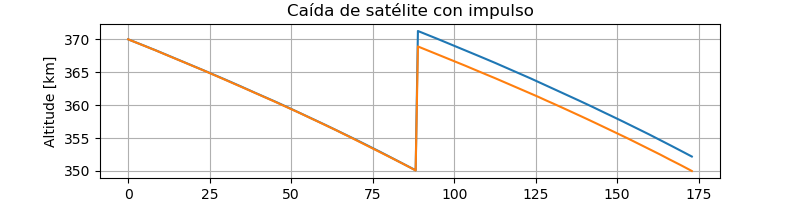

In [12]:
#PLOTTING
%matplotlib notebook
mpl.rcParams['toolbar'] = 'None'

p1 = plt.figure(figsize=(8,2))
plt.plot(tTrace[:-2:1000]/60/60/24,(apogees[:-2:1000]-Re)/1e3);
plt.plot(tTrace[:-2:1000]/60/60/24,(perigees[:-2:1000]-Re)/1e3);
plt.grid();
plt.title("Caída de satélite con impulso")
plt.xlabel("time [days]")
plt.ylabel("Altitude [km]")
mplcursors.cursor(hover=True);

In [6]:
a = (350e3+Re+370e3+Re)/2
T = 2*np.pi*(a**3/mu)**0.5
print(T/60/60)
A = np.array([1, 2, 3])
B = np.array([3, 2, 1])
C = A*B
print(C)

1.5297617407237356
[3 4 3]


In [7]:
if final_plots:
    Z = np.array([])
    X3 = np.array([])
    Y3 = np.array([])
    Z3 = np.array([])

    #THIS ITERATION HAVE TO BE OPTIMISED
    for i in range(len(maneuvers.rTrace)):
        X3 = np.append(X3,maneuvers.rTrace[i][0])
        Y3 = np.append(Y3,maneuvers.rTrace[i][1])
        Z3 = np.append(Z3,maneuvers.rTrace[i][2])
        Z = np.append(Z,np.linalg.norm(maneuvers.rTrace[i])-Re)

<IPython.core.display.Javascript object>


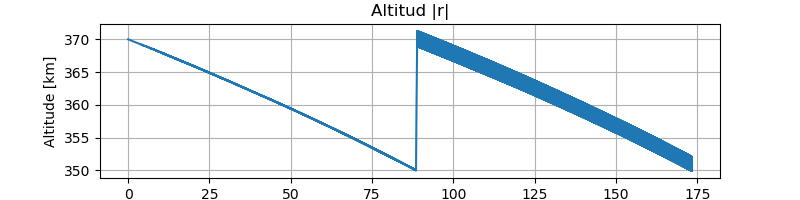

In [11]:
if final_plots:
    %matplotlib notebook
    mpl.rcParams['toolbar'] = 'None'

    p2 = plt.figure(figsize=(8,2))
    plt.plot(maneuvers.tTrace/60/60/24,(Z/1e3));
    plt.grid();
    plt.title("Altitud |r|")
    plt.xlabel("time [days]")
    plt.ylabel("Altitude [km]")

<IPython.core.display.Javascript object>


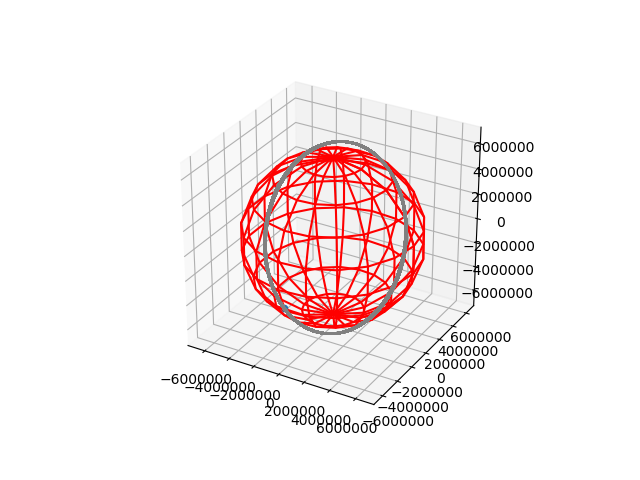

In [9]:
if final_plots:
    %matplotlib notebook
    mpl.rcParams['toolbar'] = 'None'
    #plt.figure(figsize=(8,2))
    ax = plt.axes(projection='3d')
    ax.set_aspect("equal")

    u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
    x = Re*np.cos(u)*np.sin(v)
    y = Re*np.sin(u)*np.sin(v)
    z = Re*np.cos(v)
    ax.plot_wireframe(x, y, z, color="r")
    ax.plot3D(X3, Y3, Z3, 'gray')
    ax.scatter(maneuvers.current_r[0], maneuvers.current_r[1], maneuvers.current_r[2])
    #plt.grid();